In [1]:
import os
import shutil
import random

# 🔹 CHANGE THIS TO YOUR ACTUAL PATH
base_dir = r"C:\Users\nandu\Videos\My projects\Data Science\PlantVillage"

classes = [
    "Tomato_Early_blight",
    "Tomato_Late_blight",
    "Tomato_healthy"
]

# Create train, val, test folders
for split in ["train", "val", "test"]:
    for cls in classes:
        os.makedirs(os.path.join(base_dir, split, cls), exist_ok=True)

# Split dataset
for cls in classes:
    class_path = os.path.join(base_dir, cls)
    images = os.listdir(class_path)
    random.shuffle(images)

    train_split = int(0.7 * len(images))
    val_split = int(0.9 * len(images))

    train_imgs = images[:train_split]
    val_imgs = images[train_split:val_split]
    test_imgs = images[val_split:]

    for img in train_imgs:
        shutil.copy(os.path.join(class_path, img),
                    os.path.join(base_dir, "train", cls, img))

    for img in val_imgs:
        shutil.copy(os.path.join(class_path, img),
                    os.path.join(base_dir, "val", cls, img))

    for img in test_imgs:
        shutil.copy(os.path.join(class_path, img),
                    os.path.join(base_dir, "test", cls, img))

print("Dataset split completed successfully!")

In [43]:
import os

base_dir = r"C:\Users\nandu\Videos\My projects\Data Science\PlantVillage"

print("Train classes:", os.listdir(base_dir + r"\train"))
print("Val classes:", os.listdir(base_dir + r"\val"))
print("Test classes:", os.listdir(base_dir + r"\test"))

Train classes: ['Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight']
Val classes: ['Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight']
Test classes: ['Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight']


# In Keras, the order must be:
### 1. Define model
### 2. Compile model
### 3. Train model

In [5]:
# Import Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

In [6]:
import matplotlib.pyplot as plt
print("Matplotlib installed successfully")

Matplotlib installed successfully


In [7]:
#Set Paths + Parameters
base_dir = r"C:\Users\nandu\Videos\My projects\Data Science\PlantVillage"

IMG_SIZE = 224
BATCH_SIZE = 32

In [8]:
#Load Train / Validation / Test Data
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    base_dir + r"\train",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    base_dir + r"\val",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    base_dir + r"\test",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

Found 3149 files belonging to 3 classes.
Found 900 files belonging to 3 classes.
Found 451 files belonging to 3 classes.


In [9]:
#Data Augmentation Layer
data_augmentation = models.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

In [10]:
#Load Pretrained MobileNetV2
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False

In [11]:
#Build Model
model = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(3, activation="softmax")
])

In [12]:
#Compile Model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [13]:
#Train Model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 30s 265ms/step - accuracy: 0.8368 - loss: 0.3879 - val_accuracy: 0.9200 - val_loss: 0.2324
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 25s 248ms/step - accuracy: 0.9187 - loss: 0.2118 - val_accuracy: 0.9111 - val_loss: 0.2003
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 25s 248ms/step - accuracy: 0.9349 - loss: 0.1828 - val_accuracy: 0.9167 - val_loss: 0.1917
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 25s 249ms/step - accuracy: 0.9428 - loss: 0.1472 - val_accuracy: 0.9244 - val_loss: 0.1715
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 25s 249ms/step - accuracy: 0.9508 - loss: 0.1305 - val_accuracy: 0.9444 - val_loss: 0.1518
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 26s 265ms/step - accuracy: 0.9565 - loss: 0.1216 - val_accuracy: 0.9089 - val_loss: 0.2226
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 26s 262ms/step - accuracy: 0.9552 - loss: 0.1196 - val_accuracy: 0.9467 - val_loss: 0.1526
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 26s 265ms/step - accuracy: 0.9635 - loss: 0.1037 - val_accu

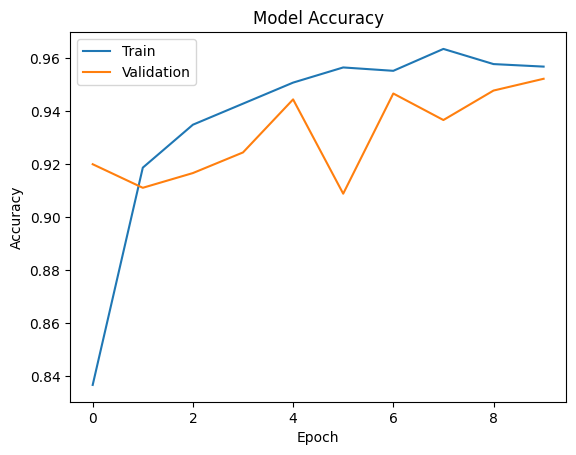

In [14]:
#Plot Accuracy + Loss
# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

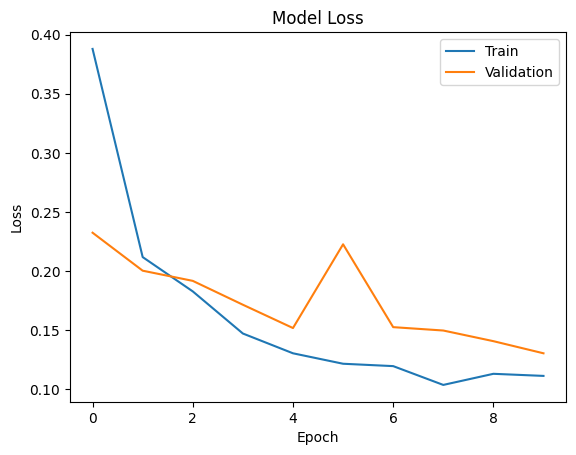

In [15]:
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.show()

In [16]:
#Fine-Tuning (Optional but Good for Portfolio)
base_model.trainable = True

for layer in base_model.layers[:-20]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)

Epoch 1/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 37s 315ms/step - accuracy: 0.8450 - loss: 0.4407 - val_accuracy: 0.9400 - val_loss: 0.1830
Epoch 2/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 30s 306ms/step - accuracy: 0.9305 - loss: 0.1865 - val_accuracy: 0.9467 - val_loss: 0.1852
Epoch 3/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 30s 304ms/step - accuracy: 0.9416 - loss: 0.1629 - val_accuracy: 0.9511 - val_loss: 0.1704
Epoch 4/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 30s 304ms/step - accuracy: 0.9495 - loss: 0.1434 - val_accuracy: 0.9522 - val_loss: 0.1744
Epoch 5/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 30s 302ms/step - accuracy: 0.9536 - loss: 0.1205 - val_accuracy: 0.9500 - val_loss: 0.1786


In [17]:
#Evaluate on Test Data
test_loss, test_acc = model.evaluate(test_ds)
print("Test Accuracy:", test_acc)

15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 176ms/step - accuracy: 0.9667 - loss: 0.1198
Test Accuracy: 0.9667405486106873


In [18]:
#Save Final Model (Correct Format)
model.save("tomato_disease_model.keras")

# **Confusion Matrix**

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 966ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 875ms/step


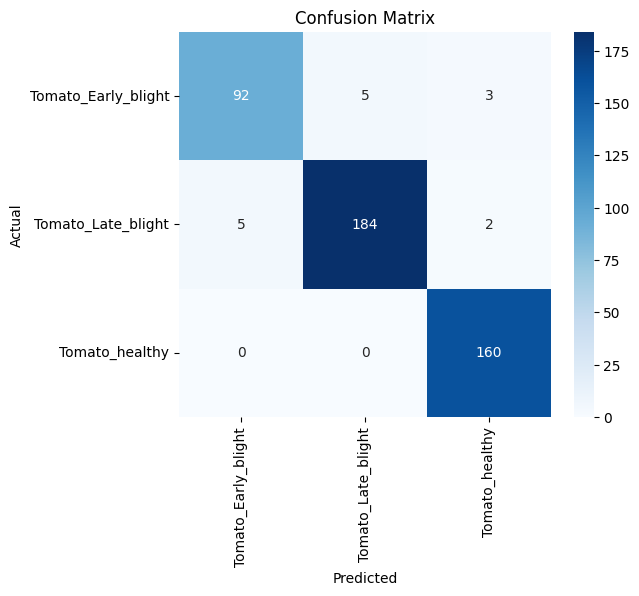

Classification Report:

                     precision    recall  f1-score   support

Tomato_Early_blight       0.95      0.92      0.93       100
 Tomato_Late_blight       0.97      0.96      0.97       191
     Tomato_healthy       0.97      1.00      0.98       160

           accuracy                           0.97       451
          macro avg       0.96      0.96      0.96       451
       weighted avg       0.97      0.97      0.97       451



In [41]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

class_names = train_ds.class_names

y_true = []
y_pred = []

for images, labels in test_ds:
    predictions = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))